In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.pylab import plt
import matplotlib.patches as mpatches

In [2]:
csv_files_raw = 'lzbench-raw.out'
df = pd.read_csv(csv_files_raw, sep=",")

df['Ratio'] = df['Ratio']/100

#raw
raw_memcpy = df[df['Compressor name'] == 'memcpy']
raw_blosc = df[df['Compressor name'] == "blosclz"]
raw_bzip2 = df[df['Compressor name'] == "bzip2"]
raw_lz4hc = df[df['Compressor name'] == "lz4hc"]
raw_lz4 = df[df['Compressor name'] == "lz4"]
raw_zstd = df[df['Compressor name'] == "zstd"]
raw_lzma = df[df['Compressor name'] == "lzma"]
raw_zlib = df[df['Compressor name'] == "zlib"]

#proc
csv_files_proc = 'lzbench-proc.out'
df_proc = pd.read_csv(csv_files_proc, sep=",")
df_proc['Ratio'] = df_proc['Ratio']/100

proc_memcpy = df_proc[df_proc['Compressor name'] == 'memcpy']
proc_blosc = df_proc[df_proc['Compressor name'] == "blosclz"]
proc_bzip2 = df_proc[df_proc['Compressor name'] == "bzip2"]
proc_lz4hc = df_proc[df_proc['Compressor name'] == "lz4hc"]
proc_lz4 = df_proc[df_proc['Compressor name'] == "lz4"]
proc_zstd = df_proc[df_proc['Compressor name'] == "zstd"]
proc_lzma = df_proc[df_proc['Compressor name'] == "lzma"]
proc_zlib = df_proc[df_proc['Compressor name'] == "zlib"]

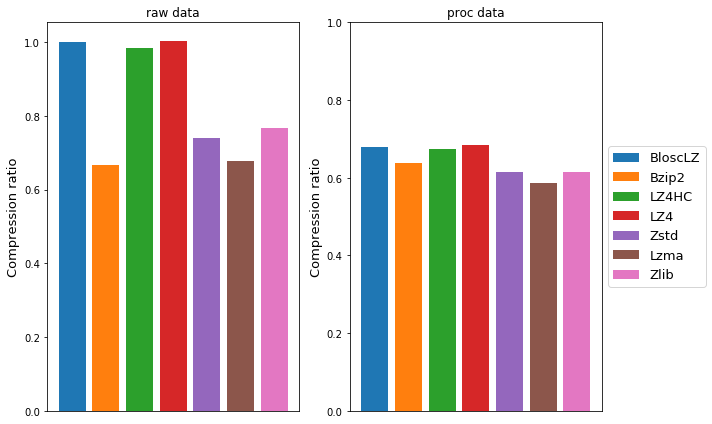

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.show()

ax1.bar('blosclz', raw_blosc.groupby(['Level'])['Ratio'].mean().min(), label='BloscLZ')
ax1.bar('bzip2', raw_bzip2.groupby(['Level'])['Ratio'].mean().min(), label='Bzip2')
ax1.bar('lz4hc', raw_lz4hc.groupby(['Level'])['Ratio'].mean().min(), label='LZ4HC')
ax1.bar('lz4', raw_lz4.groupby(['Level'])['Ratio'].mean().min(), label='LZ4')
ax1.bar('zstd', raw_zstd.groupby(['Level'])['Ratio'].mean().min(), label='Zstd')
ax1.bar('lzma', raw_lzma.groupby(['Level'])['Ratio'].mean().min(), label='Lzma')
ax1.bar('zlib', raw_zlib.groupby(['Level'])['Ratio'].mean().min(), label='Zlib')

ax2.bar('blosclz', proc_blosc.groupby(['Level'])['Ratio'].mean().min(), label='BloscLZ')
ax2.bar('bzip2', proc_bzip2.groupby(['Level'])['Ratio'].mean().min(), label='Bzip2')
ax2.bar('lz4hc', proc_lz4hc.groupby(['Level'])['Ratio'].mean().min(), label='LZ4HC')
ax2.bar('lz4', proc_lz4.groupby(['Level'])['Ratio'].mean().min(), label='LZ4')
ax2.bar('zstd', proc_zstd.groupby(['Level'])['Ratio'].mean().min(), label='Zstd')
ax2.bar('lzma', proc_lzma.groupby(['Level'])['Ratio'].mean().min(), label='Lzma')
ax2.bar('zlib', proc_zlib.groupby(['Level'])['Ratio'].mean().min(), label='Zlib')

ax1.set_title('raw data')
ax2.set_title('proc data')
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax1.set_ylabel('Compression ratio', fontsize=13)
ax2.set_ylabel('Compression ratio', fontsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)

plt.ylim(0,1)
fig.tight_layout()

Text(0.5, 0.98, 'compression speed of raw data (top) and proc data (bottom)')

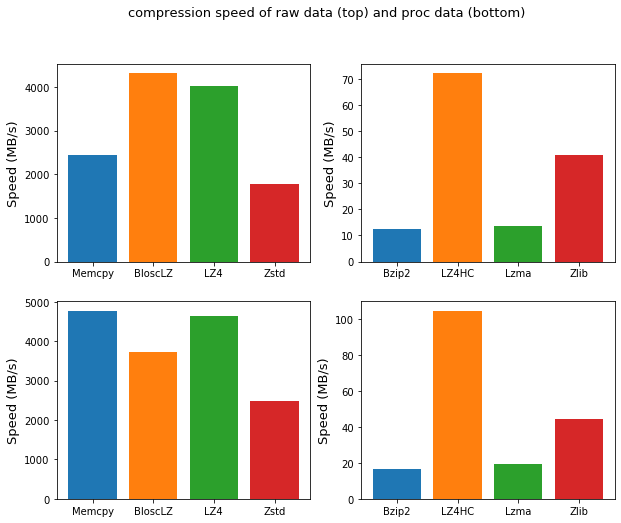

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.show()

ax[0, 0].bar('Memcpy', raw_memcpy['Compression speed'], label='memcpy')
ax[0, 0].bar('BloscLZ', raw_blosc.groupby(['Level'])['Compression speed'].mean().max(), label='BloscLZ')
ax[0, 0].bar('LZ4', raw_lz4.groupby(['Level'])['Compression speed'].mean().max(), label='LZ4')
ax[0, 0].bar('Zstd', raw_zstd.groupby(['Level'])['Compression speed'].mean().max(), label='Zstd')
ax[0, 1].bar('Bzip2', raw_bzip2.groupby(['Level'])['Compression speed'].mean().max(), label='Bzip2')
ax[0, 1].bar('LZ4HC', raw_lz4hc.groupby(['Level'])['Compression speed'].mean().max(), label='LZ4HC')
ax[0, 1].bar('Lzma', raw_lzma.groupby(['Level'])['Compression speed'].mean().max(), label='Lzma')
ax[0, 1].bar('Zlib', raw_zlib.groupby(['Level'])['Compression speed'].mean().max(), label='Zlib')

ax[1, 0].bar('Memcpy', proc_memcpy['Compression speed'], label='memcpy')
ax[1, 0].bar('BloscLZ', proc_blosc.groupby(['Level'])['Compression speed'].mean().max(), label='BloscLZ')
ax[1, 0].bar('LZ4', proc_lz4.groupby(['Level'])['Compression speed'].mean().max(), label='LZ4')
ax[1, 0].bar('Zstd', proc_zstd.groupby(['Level'])['Compression speed'].mean().max(), label='Zstd')
ax[1, 1].bar('Bzip2', proc_bzip2.groupby(['Level'])['Compression speed'].mean().max(), label='Bzip2')
ax[1, 1].bar('LZ4HC', proc_lz4hc.groupby(['Level'])['Compression speed'].mean().max(), label='LZ4HC')
ax[1, 1].bar('Lzma', proc_lzma.groupby(['Level'])['Compression speed'].mean().max(), label='Lzma')
ax[1, 1].bar('Zlib', proc_zlib.groupby(['Level'])['Compression speed'].mean().max(), label='Zlib')

ax[1, 0].set_ylabel('Speed (MB/s)', fontsize=13)
ax[0, 0].set_ylabel('Speed (MB/s)', fontsize=13)
ax[0, 1].set_ylabel('Speed (MB/s)', fontsize=13)
ax[1, 1].set_ylabel('Speed (MB/s)', fontsize=13)
plt.suptitle('compression speed of raw data (top) and proc data (bottom)', fontsize=13)

Text(0.5, 0.98, 'decompression speed of raw data (top) and proc data (bottom)')

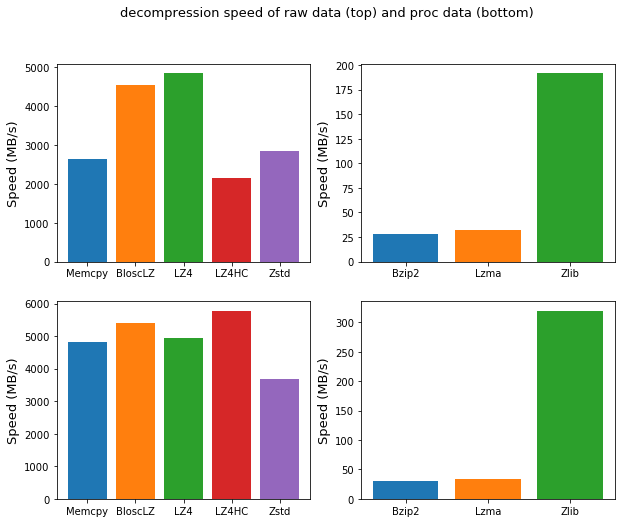

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.show()

ax[0, 0].bar('Memcpy', raw_memcpy['Decompression speed'], label='memcpy')
ax[0, 0].bar('BloscLZ', raw_blosc.groupby(['Level'])['Decompression speed'].mean().max(), label='blosc')
ax[0, 0].bar('LZ4', raw_lz4.groupby(['Level'])['Decompression speed'].mean().max(), label='lz4')
ax[0, 0].bar('LZ4HC', raw_lz4hc.groupby(['Level'])['Decompression speed'].mean().max(), label='lz4hc')
ax[0, 0].bar('Zstd', raw_zstd.groupby(['Level'])['Decompression speed'].mean().max(), label='zstd')
ax[0, 1].bar('Bzip2', raw_bzip2.groupby(['Level'])['Decompression speed'].mean().max(), label='bzip2')
ax[0, 1].bar('Lzma', raw_lzma.groupby(['Level'])['Decompression speed'].mean().max(), label='lzma')
ax[0, 1].bar('Zlib', raw_zlib.groupby(['Level'])['Decompression speed'].mean().max(), label='zlib')

ax[1, 0].bar('Memcpy', proc_memcpy['Decompression speed'], label='memcpy')
ax[1, 0].bar('BloscLZ', proc_blosc.groupby(['Level'])['Decompression speed'].mean().max(), label='blosc')
ax[1, 0].bar('LZ4', proc_lz4.groupby(['Level'])['Decompression speed'].mean().max(), label='lz4')
ax[1, 0].bar('LZ4HC', proc_lz4hc.groupby(['Level'])['Decompression speed'].mean().max(), label='lz4hc')
ax[1, 0].bar('Zstd', proc_zstd.groupby(['Level'])['Decompression speed'].mean().max(), label='zstd')
ax[1, 1].bar('Bzip2', proc_bzip2.groupby(['Level'])['Decompression speed'].mean().max(), label='bzip2')
ax[1, 1].bar('Lzma', proc_lzma.groupby(['Level'])['Decompression speed'].mean().max(), label='lzma')
ax[1, 1].bar('Zlib', proc_zlib.groupby(['Level'])['Decompression speed'].mean().max(), label='zlib')

ax[1, 0].set_ylabel('Speed (MB/s)', fontsize=13)
ax[0, 0].set_ylabel('Speed (MB/s)', fontsize=13)
ax[0, 1].set_ylabel('Speed (MB/s)', fontsize=13)
ax[1, 1].set_ylabel('Speed (MB/s)', fontsize=13)

plt.suptitle('decompression speed of raw data (top) and proc data (bottom)', fontsize=13)

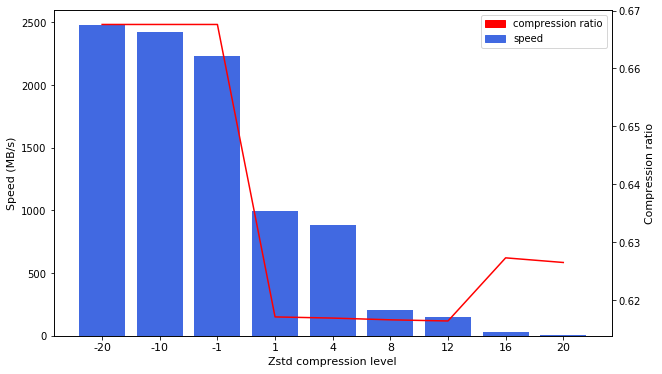

In [12]:
#PROC ZSTD
x = ['-20', '-10', '-1', '1', '4', '8', '12', '16', '20']
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()
ax.bar(x, [2477.80,2420.84,2229.94,996.02,885.96,203.12,149.28,26.57,8.11], color='royalblue', label='speed')
ax2.plot(x, [0.6676,0.6676,0.6676,0.6171,0.6169,0.6166,0.6164,0.6273,0.6265], color='red', label='ratio')

ax.set_ylabel('Speed (MB/s)', fontsize=11)
ax2.set_ylabel('Compression ratio', fontsize=11)
ax.set_xlabel('Zstd compression level', fontsize=11)

ax.set_xticklabels(x, fontsize=11)
ratio_legend = mpatches.Patch(color='red', label='compression ratio')
speed_legend = mpatches.Patch(color='royalblue', label='speed')
plt.legend(loc="best", handles=[ratio_legend, speed_legend])